# 1. Data Understanding

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('heart_disease_uci.csv')

In [3]:
df.head()

id  age     sex    dataset               cp  trestbps   chol    fbs   
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True  \
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca   
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0  \
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0

Prediksi ini bertujuan untuk menentukan apakah seseorang berisiko terkena penyakit jantung atau tidak.

In [4]:
df['num'] = df['num'].apply(lambda x: 1 if x >= 1 else 0)

In [5]:
df.describe().T

count        mean         std   min     25%    50%     75%    max
id        920.0  460.500000  265.725422   1.0  230.75  460.5  690.25  920.0
age       920.0   53.510870    9.424685  28.0   47.00   54.0   60.00   77.0
trestbps  861.0  132.132404   19.066070   0.0  120.00  130.0  140.00  200.0
chol      890.0  199.130337  110.780810   0.0  175.00  223.0  268.00  603.0
thalch    865.0  137.545665   25.926276  60.0  120.00  140.0  157.00  202.0
oldpeak   858.0    0.878788    1.091226  -2.6    0.00    0.5    1.50    6.2
ca        309.0    0.676375    0.935653   0.0    0.00    0.0    1.00    3.0
num       920.0    0.553261    0.497426   0.0    0.00    1.0    1.00    1.0

In [6]:
df.describe(include='object').T

count unique           top freq
sex       920      2          Male  726
dataset   920      4     Cleveland  304
cp        920      4  asymptomatic  496
fbs       830      2         False  692
restecg   918      3        normal  551
exang     865      2         False  528
slope     611      3          flat  345
thal      434      3        normal  196

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [8]:
for col in df.select_dtypes(include='object').columns:
    print(f'{col}: {df[col].unique()}')

sex: ['Male' 'Female']
dataset: ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
cp: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
fbs: [True False nan]
restecg: ['lv hypertrophy' 'normal' 'st-t abnormality' nan]
exang: [False True nan]
slope: ['downsloping' 'flat' 'upsloping' nan]
thal: ['fixed defect' 'normal' 'reversable defect' nan]


# 2. Exploratory Data Analysis

Memperlihatkan kolom dan barisnya

In [9]:
df.shape

(920, 16)

In [10]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

"Ada beberapa kolom dengan banyak nilai kosong (null). Kolom *ca* dan *thal* memiliki nilai kosong lebih dari setengah, sementara kolom *slope* memiliki nilai kosong sekitar sepertiga, sehingga sebaiknya dihapus. Untuk kolom lainnya yang memiliki sedikit nilai kosong, dapat dilakukan imputasi."

In [11]:
df.duplicated().sum()

0

Tidak ada data yang duplikat, jadi aman.

<AxesSubplot:ylabel='count'>

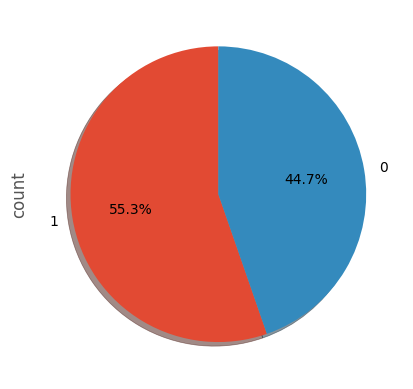

In [ ]:
#Visualisasikan distribusi variabel target menggunakan diagram lingkaran (pie chart).

df['num'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)

Berikut adalah distribusi dari variabel yang akan diprediksi.

Target: [0 = tidak ada penyakit jantung; 1, 2, 3, 4 = tahap-tahap penyakit jantung].

<AxesSubplot:xlabel='age', ylabel='Count'>

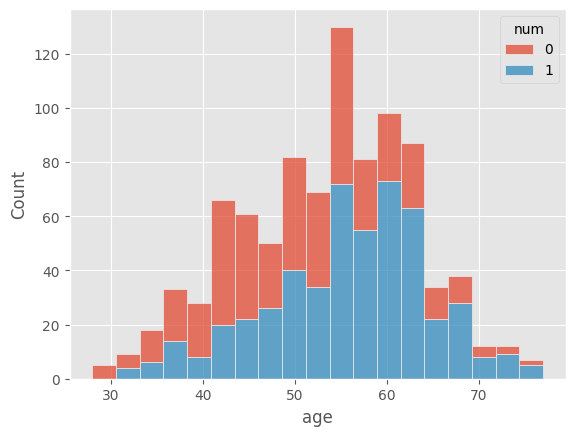

In [ ]:
#Melihat distribusi usia pada setiap kelas angka.

sns.histplot(data=df, x='age', hue='num', multiple='stack')

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_pie_grid(df, category_col, value_col, grid_shape=(2, 2), figsize=(10, 8)):
    categories = df[category_col].unique()
    rows, cols = grid_shape
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()

    for i, category in enumerate(categories):
        if i >= len(axes):
            break
        category_data = df[df[category_col] == category][value_col].value_counts()
        axes[i].pie(category_data, labels=category_data.index, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(f'{category} Distribution')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


Hal ini berarti semakin tinggi usia, semakin besar kemungkinan seseorang mengalami penyakit jantung.

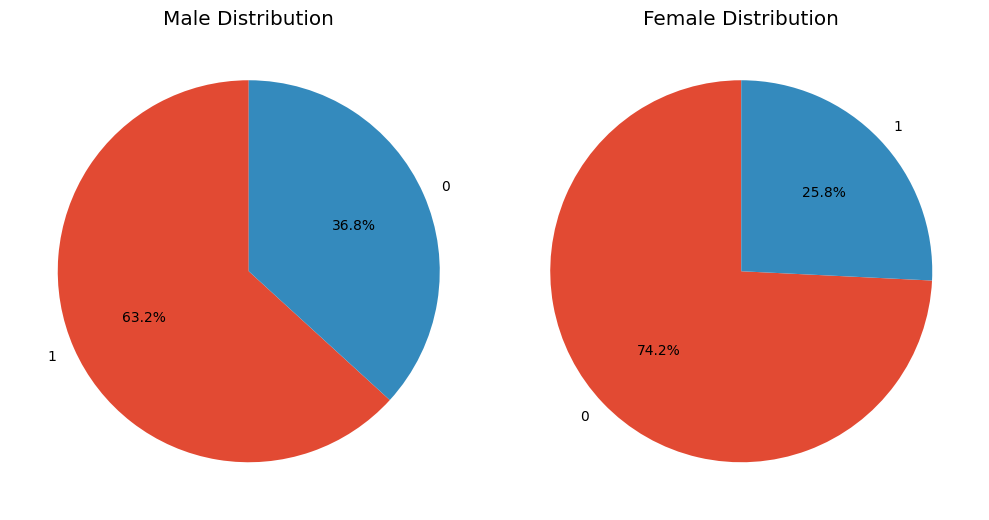

In [15]:
plot_pie_grid(df, category_col='sex', value_col='num', grid_shape=(1,2), figsize=(10, 8))

Dari sini, terlihat bahwa pria (male) cenderung lebih berisiko terkena penyakit jantung.

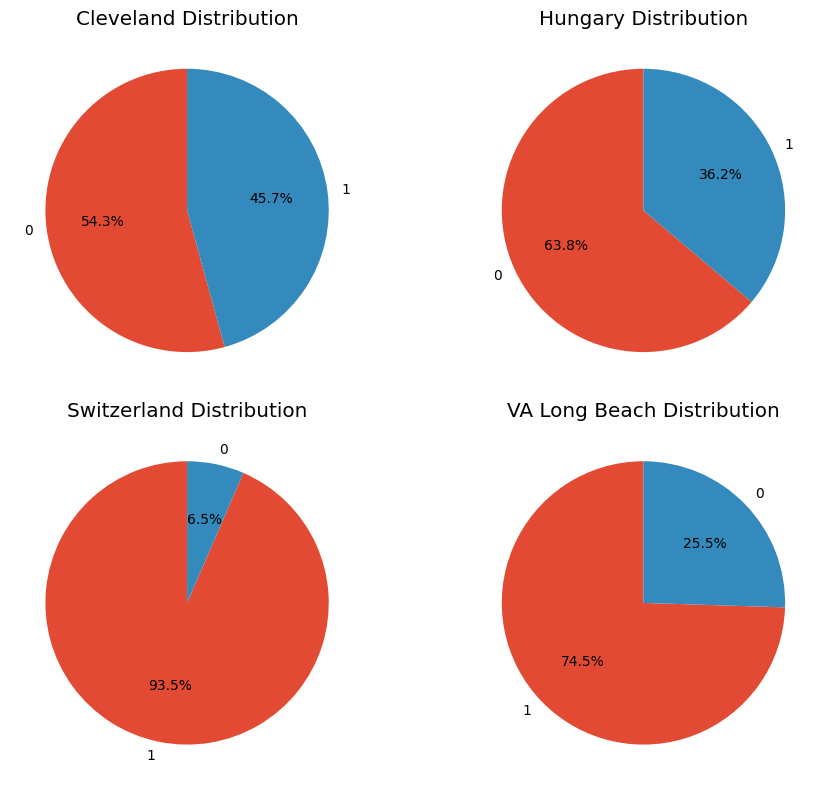

In [16]:
plot_pie_grid(df, category_col='dataset', value_col='num', grid_shape=(2, 2), figsize=(10, 8))


Cleveland dan Hungary memiliki angka penderita penyakit jantung yang relatif sedikit, sementara Switzerland memiliki angka tertinggi. VA Long Beach memiliki sekitar 3/4 kasus penderita penyakit jantung.

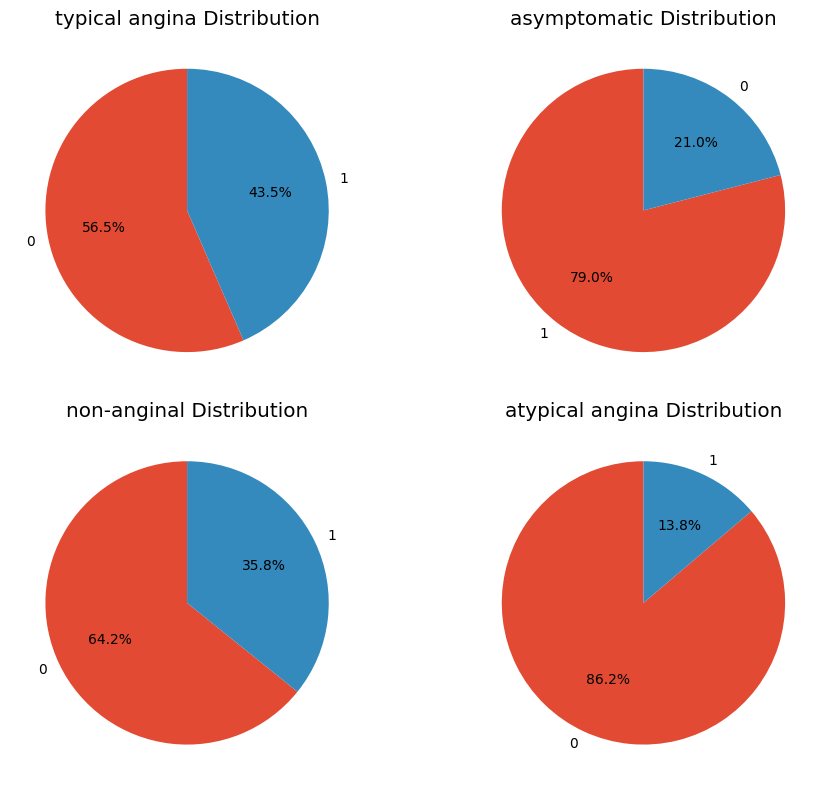

In [17]:
plot_pie_grid(df, category_col='cp', value_col='num', grid_shape=(2, 2), figsize=(10, 8))

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

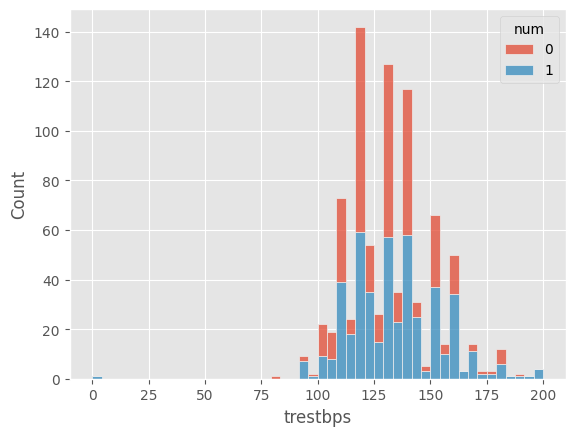

In [18]:
sns.histplot(data=df, x='trestbps', hue='num', multiple='stack')

Distribusinya normal, namun terdapat outlier pada *trestbps* dengan nilai 0, sehingga sedikit bergeser ke kanan.

<AxesSubplot:xlabel='chol', ylabel='Count'>

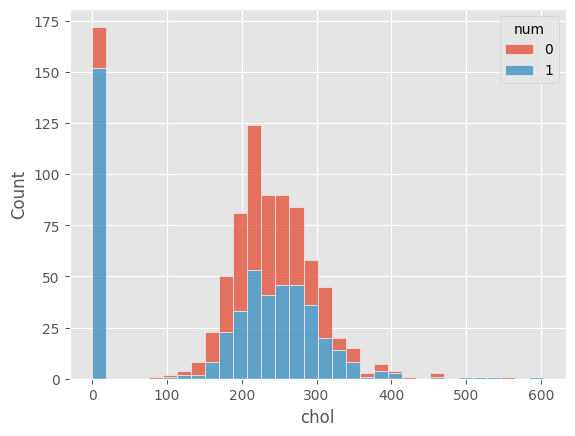

In [19]:
sns.histplot(data=df, x='chol', hue='num', multiple='stack')

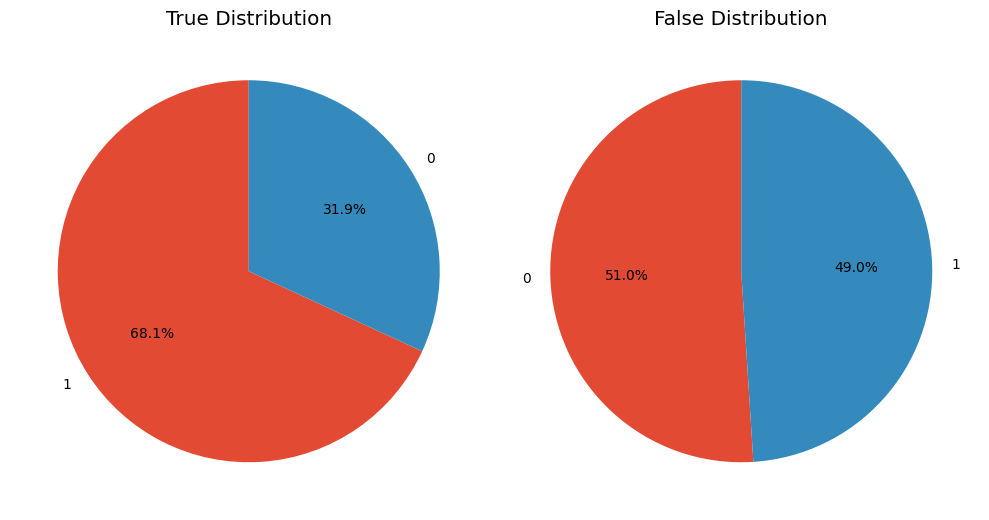

In [20]:
plot_pie_grid(df, category_col='fbs', value_col='num', grid_shape=(1, 2), figsize=(10, 8))

Orang yang memiliki kadar *fbs* (gula darah puasa) > 120 mg/dl cenderung lebih berisiko terkena penyakit jantung.

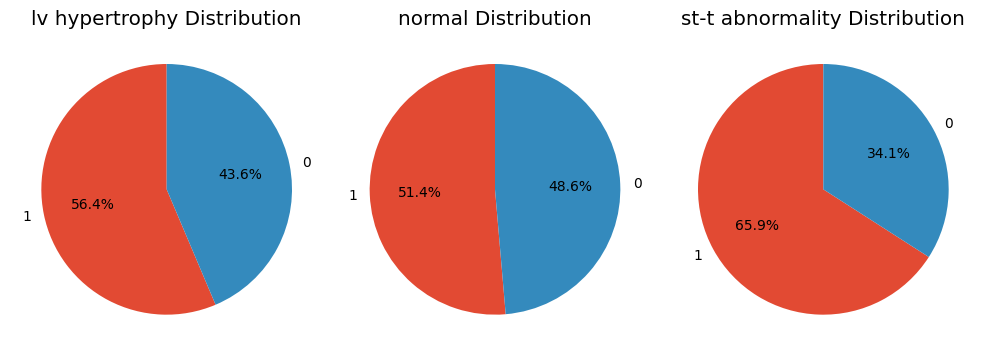

In [21]:
plot_pie_grid(df, category_col='restecg', value_col='num', grid_shape=(1, 3), figsize=(10, 8))

Distribusinya kurang lebih sama.

<AxesSubplot:xlabel='thalch', ylabel='Count'>

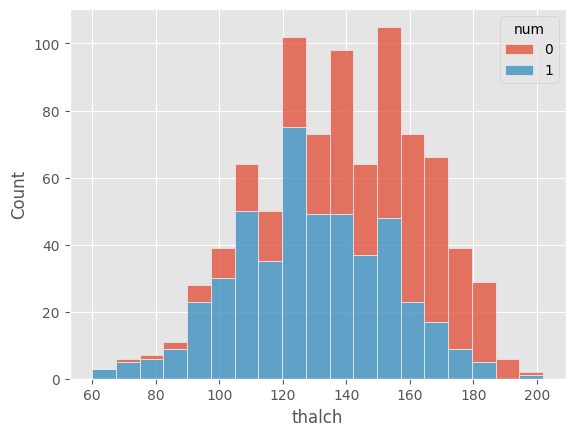

In [22]:
sns.histplot(data=df, x='thalch', hue='num', multiple='stack')

Distribusinya juga normal.

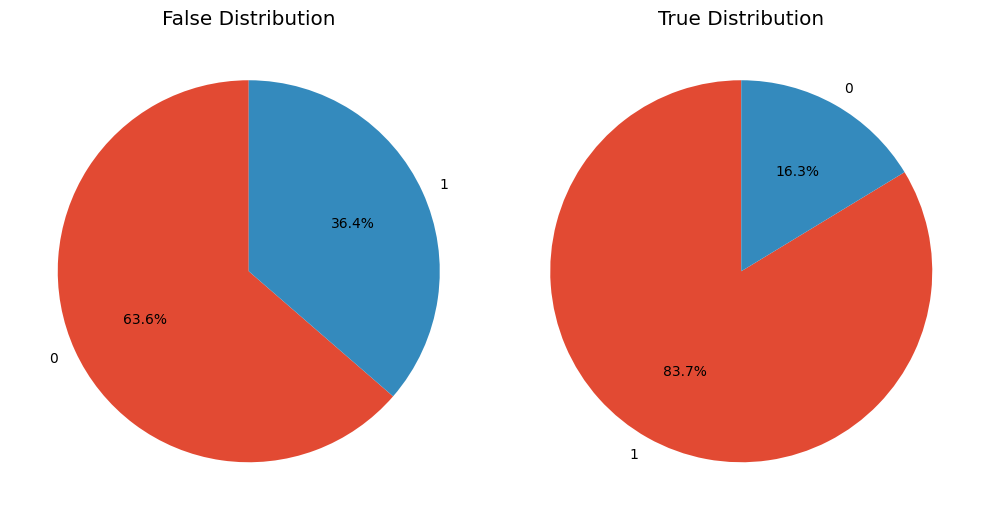

In [23]:
plot_pie_grid(df, category_col='exang', value_col='num', grid_shape=(1, 2), figsize=(10, 8))

Jika *exercise-induced angina* bernilai true, maka seseorang cenderung lebih berisiko terkena penyakit jantung.

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

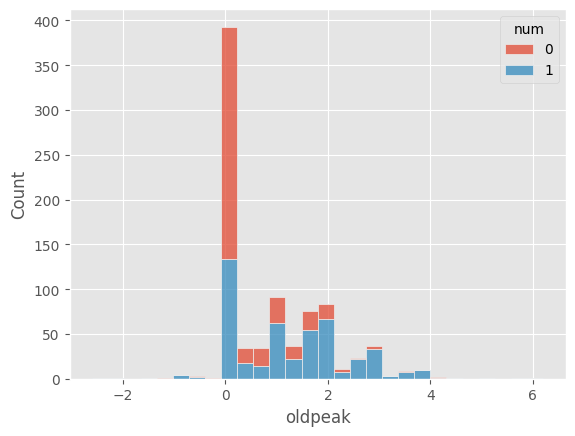

In [24]:
sns.histplot(data=df, x='oldpeak', hue='num', multiple='stack')

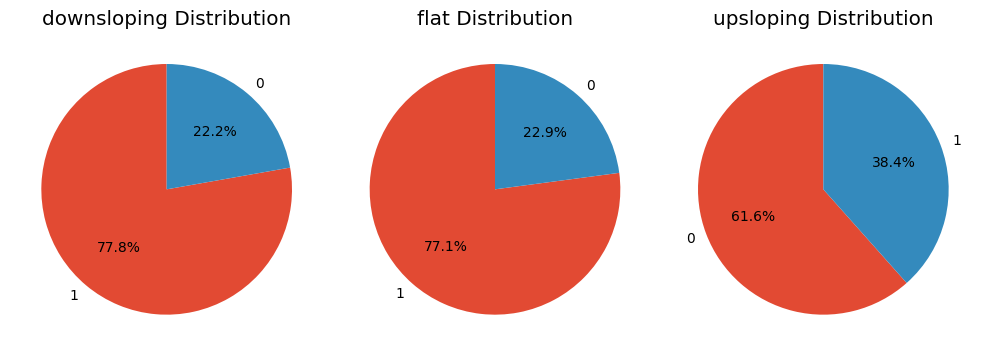

In [25]:
plot_pie_grid(df, category_col='slope', value_col='num', grid_shape=(1, 3), figsize=(10, 8))

Dari sini, terlihat bahwa jika *upsloping* maka kemungkinan terkena penyakit jantung paling kecil.

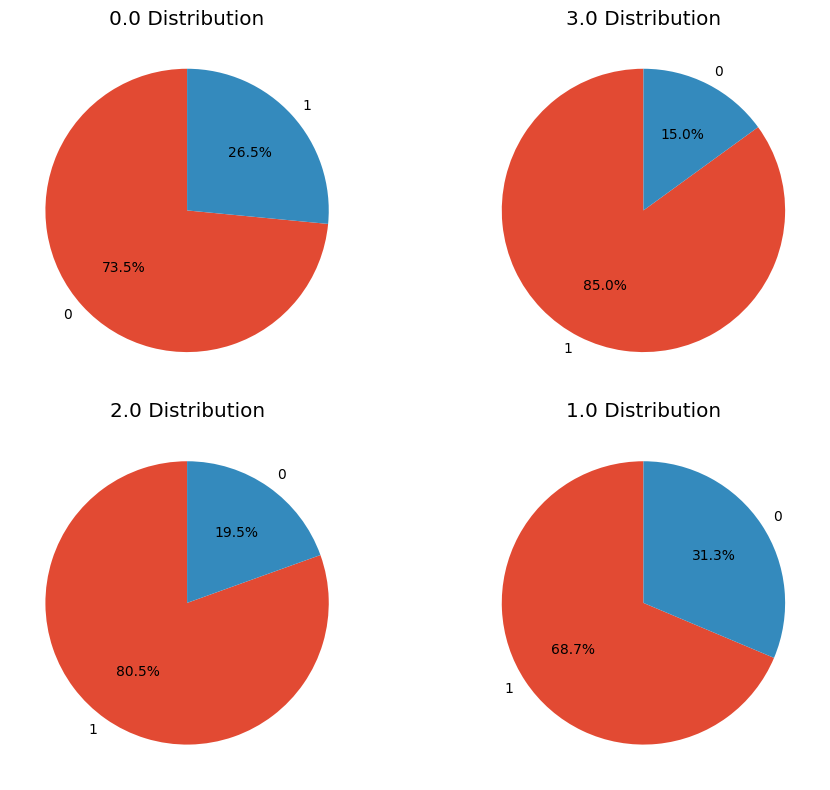

In [26]:
plot_pie_grid(df, category_col='ca', value_col='num', grid_shape=(2, 2), figsize=(10, 8))

Jika nilai *ca* adalah 0, kemungkinan besar seseorang tidak akan terkena penyakit jantung.

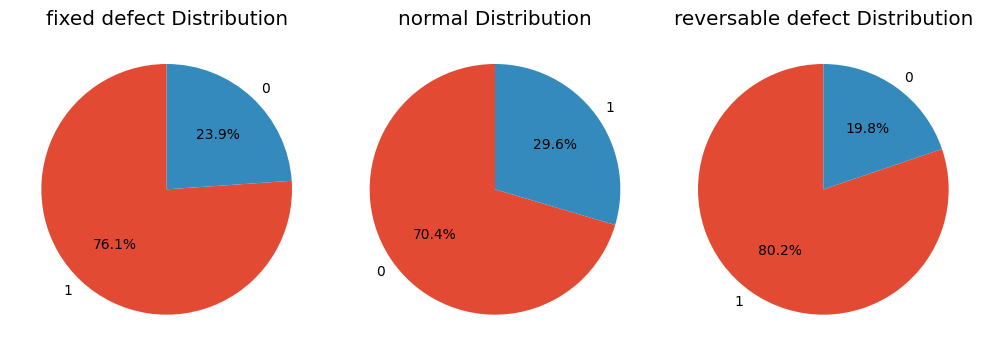

In [27]:
plot_pie_grid(df, category_col='thal', value_col='num', grid_shape=(1, 3), figsize=(10, 8))

Jika nilainya normal, kemungkinan terkena penyakit jantung paling kecil.

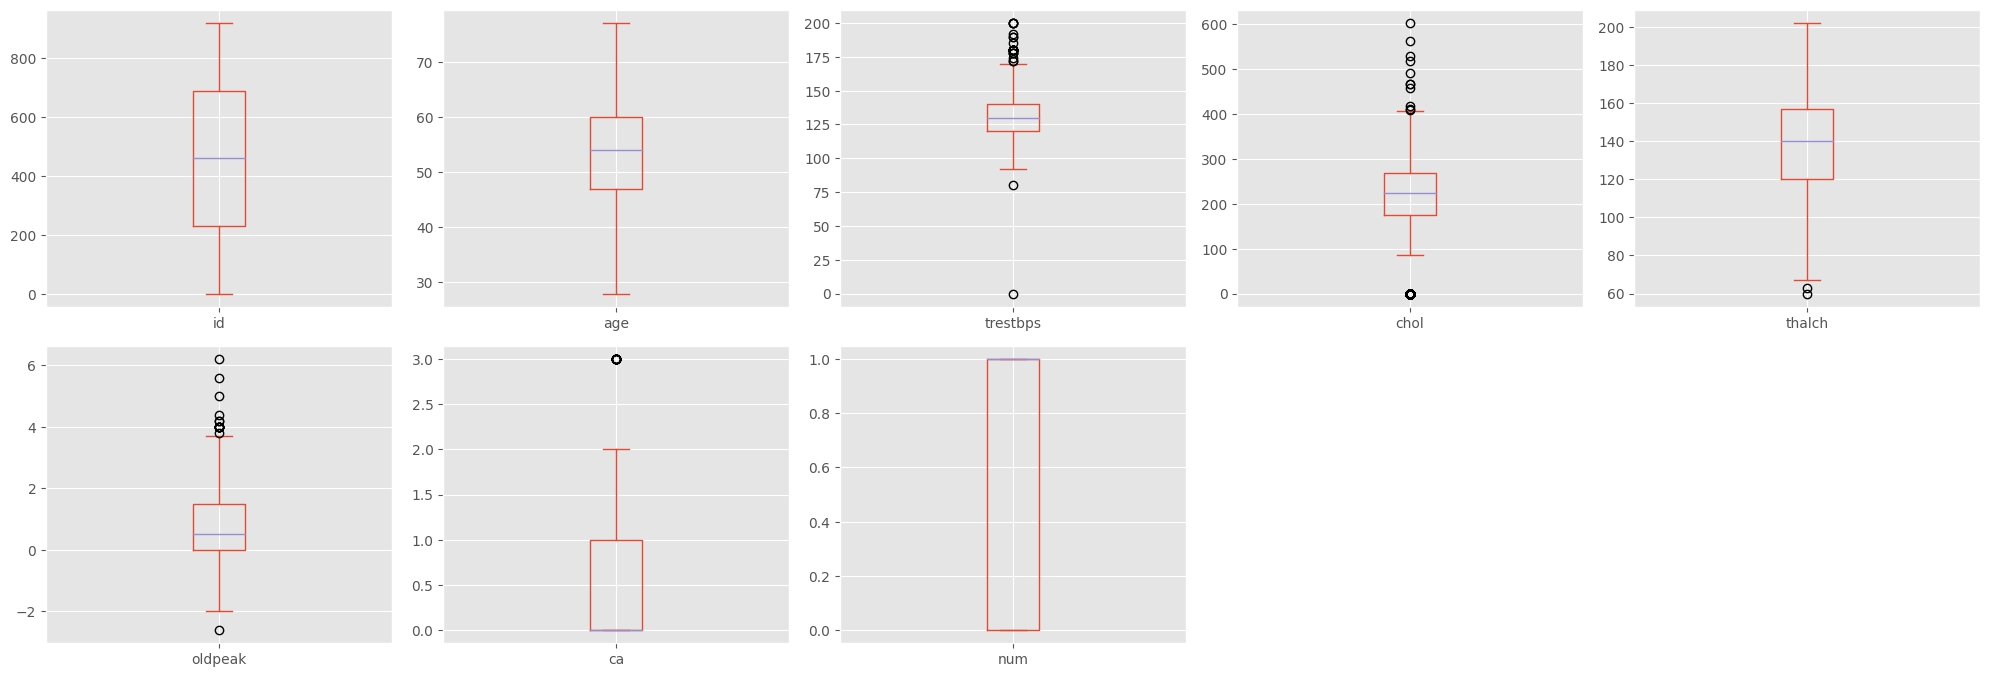

In [28]:
df.plot(kind='box', subplots=True, layout=(3, 5), figsize=(20, 10))
plt.tight_layout()

# 3. Data Preprocessing

* Drop (Hapus) kolom yg tidak berkorelasi

In [29]:
df.drop('id', axis=1, inplace=True) 

* Handle null value

In [30]:
df.isnull().sum()

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


In [32]:
df.drop(['slope', 'ca', 'thal'], axis=1, inplace=True)

In [33]:

numeric_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']
categorical = ['fbs', 'restecg', 'exang']

In [34]:
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

for col in categorical:
    df[col].fillna(df[col].mode()[0], inplace=True)

Encode nilai kategorikal berdasarkan persentase jumlah *num == 1*. Semakin besar persentase *num == 1*, semakin besar label yang diberikan.

In [35]:
df['sex'] = df['sex'].replace({'Male': 1, 'Female': 0})

df['dataset'] = df['dataset'].replace({
    'Hungary': 0,
    'Cleveland': 1,
    'VA Long Beach': 2,
    'Switzerland': 3
})

df['cp'] = df['cp'].replace({
    'atypical angina': 0,
    'non-anginal': 1,
    'typical angina': 2,
    'asymptomatic': 3
})

df['fbs'] = df['fbs'].replace({'True': 1, 'False': 0})

df['restecg'] = df['restecg'].replace({
    'normal': 0,
    'lv hypertrophy': 1,
    'st-t abnormality': 2
})

df['exang'] = df['exang'].replace({'False': 0, 'True': 1})



In [36]:
#standard scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns='num'))

scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])

scaled_df['num'] = df['num']

scaled_df.head()

age       sex   dataset        cp  trestbps      chol       fbs   
0  1.007386  0.516931 -0.162841  0.049475  0.698041  0.311021  2.380476  \
1  1.432034  0.516931 -0.162841  0.862272  1.511761  0.797713 -0.420084   
2  1.432034  0.516931 -0.162841  0.862272 -0.658158  0.274289 -0.420084   
3 -1.752828  0.516931 -0.162841 -0.763322 -0.115679  0.467130 -0.420084   
4 -1.328180 -1.934494 -0.162841 -1.576119 -0.115679  0.044717 -0.420084   

   restecg    thalch     exang   oldpeak  num  
0  0.51201  0.495698 -0.760292  1.349421    0  
1  0.51201 -1.175955  1.315283  0.589832    1  
2  0.51201 -0.340128  1.315283  1.634267    1  
3 -0.74748  1.968345 -0.760292  2.488805    0  
4  0.51201  1.371326 -0.760292  0.494884    0

In [37]:
scaled_df.dropna(inplace=True)

# 4. Data Modeling

* Split data

In [38]:
from sklearn.model_selection import train_test_split

X = scaled_df.drop(columns='num')
y = scaled_df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# classification models
from sklearn.ensemble import RandomForestClassifier

# evaluation metrics
from sklearn.metrics import accuracy_score, precision_score,classification_report, confusion_matrix
from sklearn.metrics import recall_score, f1_score

# membuat direktori model
models = {
    'RandomForestClassifier': RandomForestClassifier(class_weight='balanced'),
}

# fungsi untuk melatih dan mengevaluasi model

def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        print(f'{name}:')
        print(f'Accuracy: {accuracy}')
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'F1 Score: {f1}')
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))
        print('\n')
    
train_and_evaluate(models, X_train, X_test, y_train, y_test)

RandomForestClassifier:
Accuracy: 0.8532608695652174
Precision: 0.8545505458446394
Recall: 0.8532608695652174
F1 Score: 0.8536757271159222
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        75
           1       0.89      0.86      0.87       109

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

[[63 12]
 [15 94]]




In [40]:
#grid search untuk random forest classifier

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(class_weight='balanced')

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

In [41]:
best_rf = grid_search.best_estimator_

best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')

recall = recall_score(y_test, y_pred, average='weighted')

f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')

print(f'Precision: {precision}')

print(f'Recall: {recall}')

print(f'F1 Score: {f1}')

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8315217391304348
Precision: 0.8358609880855843
Recall: 0.8315217391304348
F1 Score: 0.8324829608318973
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        75
           1       0.88      0.83      0.85       109

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.83      0.83       184

[[63 12]
 [19 90]]


In [42]:
#save model

import joblib

joblib.dump(best_rf, 'heart_disease_model.pkl')

#save scaler

joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

# Clustering model

Column selection

In [43]:
scaled_df

age       sex   dataset        cp  trestbps      chol       fbs   
0    1.007386  0.516931 -0.162841  0.049475  0.698041  0.311021  2.380476  \
1    1.432034  0.516931 -0.162841  0.862272  1.511761  0.797713 -0.420084   
2    1.432034  0.516931 -0.162841  0.862272 -0.658158  0.274289 -0.420084   
3   -1.752828  0.516931 -0.162841 -0.763322 -0.115679  0.467130 -0.420084   
4   -1.328180 -1.934494 -0.162841 -1.576119 -0.115679  0.044717 -0.420084   
..        ...       ...       ...       ...       ...       ...       ...   
915  0.051927 -1.934494  0.816331  0.862272 -0.278423  1.229308  2.380476   
916  0.901224  0.516931  0.816331  0.049475  0.000000 -0.552169 -0.420084   
917  0.158089  0.516931  0.816331  0.862272 -0.549662  0.219192  2.380476   
918  0.476575  0.516931  0.816331  0.862272  0.000000  1.706817  2.380476   
919  0.901224  0.516931  0.816331 -1.576119 -0.658158  0.503861 -0.420084   

      restecg    thalch     exang   oldpeak  num  
0    0.512010  0.495698 -0.760292  1.349421    0  
1    0.512010 -1.175955  1.315283  0.589832    1  
2    0.512010 -0.340128  1.315283  1.634267    1  
3   -0.747480  1.968345 -0.760292  2.488805    0  
4    0.512010  1.371326 -0.760292  0.494884    0  
..        ...       ...       ...       ...  ...  
915  1.771499  0.654903 -0.760292 -0.834397    1  
916  1.771499  0.000000 -0.760292  0.000000    0  
917  1.771499 -1.494365 -0.760292 -0.834397    1  
918  0.512010  0.000000 -0.760292  0.000000    0  
919  0.512010 -1.772974  1.315283 -0.834397    1  

[920 rows x 12 columns]

In [44]:
df_clustering = scaled_df[['age', 'sex','dataset','chol','thalch','oldpeak']]

In [45]:
#pca on df_clustering

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_features = pca.fit_transform(df_clustering)

pca_df = pd.DataFrame(pca_features, columns=['pca1', 'pca2'])

pca_df.head()

pca1      pca2
0  0.367343  1.338566
1  0.857819  1.723414
2  0.958505  1.902947
3 -1.199802  0.493755
4 -1.682810 -0.400635

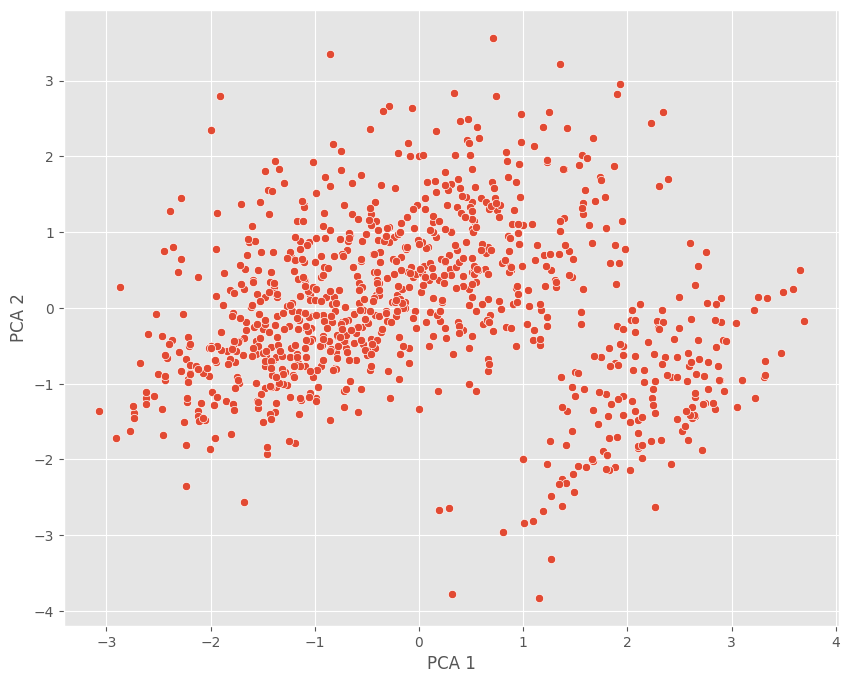

In [46]:
#visualize pca_df

plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca1', y='pca2', data=pca_df)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

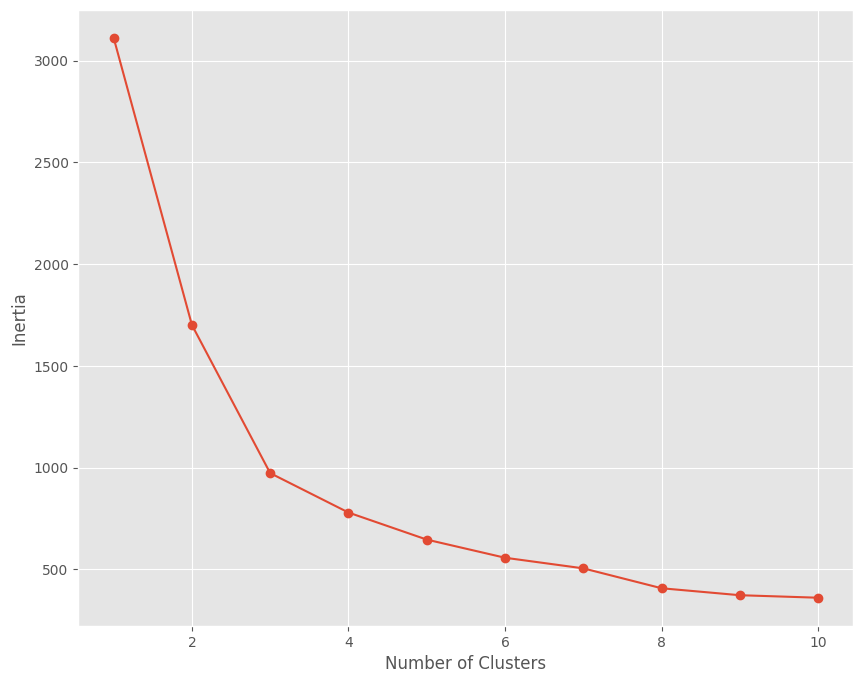

In [ ]:
# Metode elbow untuk menentukan jumlah klaster

from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [48]:
#kmeans clustering

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(pca_df)

pca_df['cluster'] = kmeans.labels_

pca_df.head()


pca1      pca2  cluster
0  0.367343  1.338566        1
1  0.857819  1.723414        1
2  0.958505  1.902947        1
3 -1.199802  0.493755        0
4 -1.682810 -0.400635        0

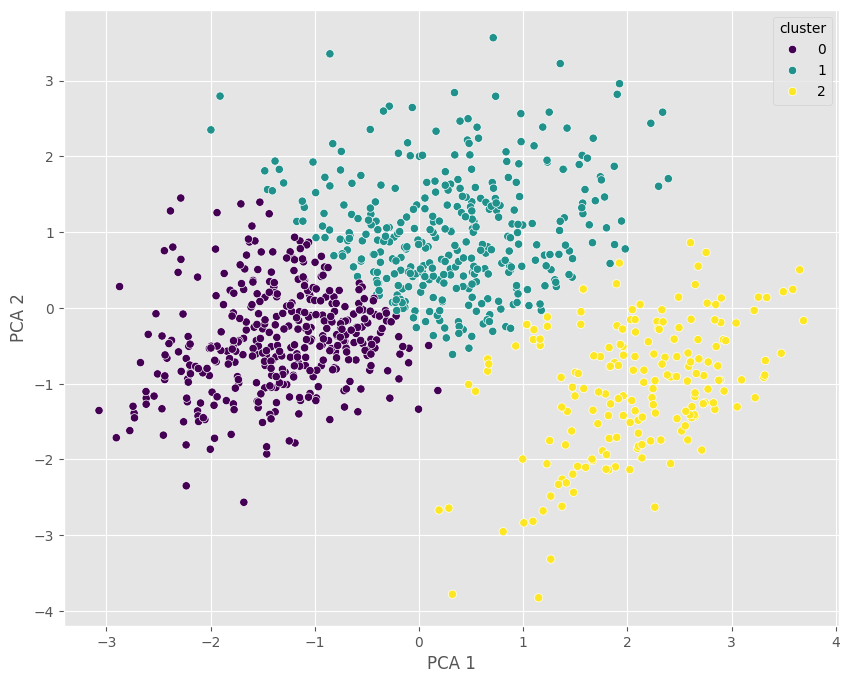

In [49]:
#visualize the clusters

plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca1', y='pca2', data=pca_df, hue='cluster', palette='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [ ]:
#silhouette score

from sklearn.metrics import silhouette_score

silhouette_score(pca_df, kmeans.labels_)

0.5058283950439845

In [51]:
#save kmeans model

joblib.dump(kmeans, 'kmeans_model.pkl')

#save pca model

joblib.dump(pca, 'pca_model.pkl')

['pca_model.pkl']